In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dfx=pd.read_csv('linearX.csv')
dfy=pd.read_csv('linearY.csv')

x=dfx.values
y=dfy.values
print(x.shape,y.shape)


(99, 1) (99, 1)


In [8]:
x=x.reshape((-1,))
y=y.reshape((-1))
print(x.shape,y.shape)

(99,) (99,)


In [10]:
X=(x-x.mean())/x.std()
Y=y

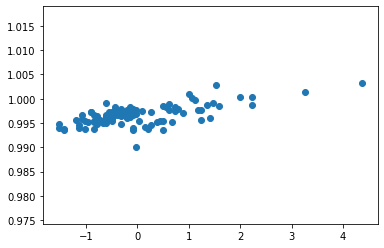

In [11]:
plt.scatter(X,Y)
plt.show()

In [17]:
def hypothesis(x,theta):
    return theta[0] +theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad=np.zeros((2,))
    m=X.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad

def gradientdescent(X,Y,learning_rate=0.001):
    
    theta=np.array([-2.0,0.0])
    itr=0
    
    max_itr=100
    
    error_list=[]
    theta_list=[]
    
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[1]=theta[1]-learning_rate*grad[1]
        theta[0]=theta[0]-learning_rate*grad[0]
        
        itr+=1
        
    return theta,error_list,theta_list
    


In [18]:
final_theta,error_list,theta_list=gradientdescent(X,Y)

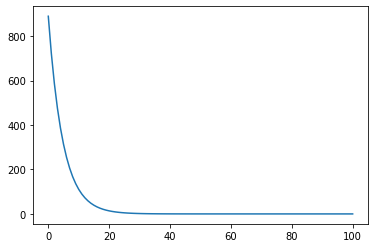

In [21]:
plt.plot(error_list)
plt.show()

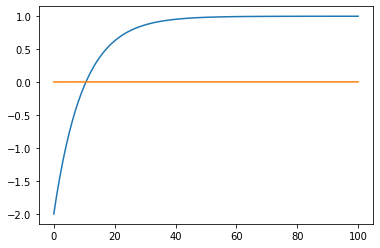

In [22]:
plt.plot(theta_list)
plt.show()


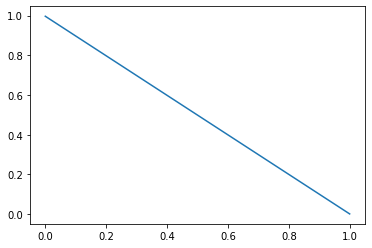

In [23]:
plt.plot(final_theta)
plt.show()

In [26]:
xtest=np.linspace(-4,6,10)
print(xtest)

[-4.         -2.88888889 -1.77777778 -0.66666667  0.44444444  1.55555556
  2.66666667  3.77777778  4.88888889  6.        ]


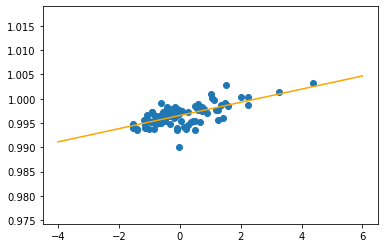

In [27]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='Prediction')
plt.show()